In [ ]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import thư viện liên quan.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


kết nối với drive


Tương quan giữa các thuộc tính và phân bố kích thước của bounding box

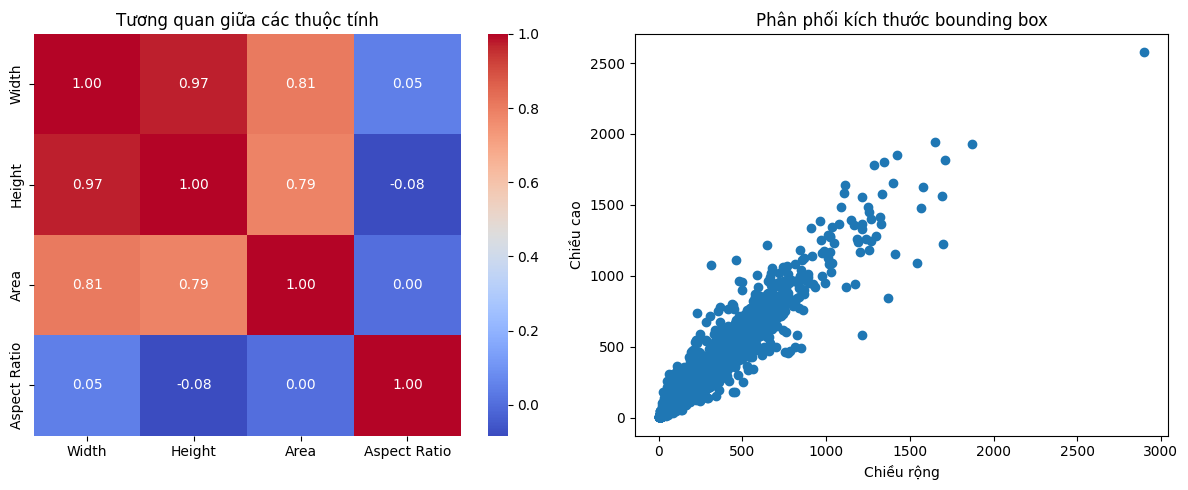

In [ ]:
folder_path = '/content/gdrive/MyDrive/Dataset/Annotations-20231118T101906Z-001/Annotations'


object_sizes_all = []


for filename in os.listdir(folder_path):
    if filename.endswith(".xml"):
        # Đọc file XML
        xml_file_path = os.path.join(folder_path, filename)
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        # Phân tích số lượng và kích thước của các bounding box
        object_sizes = []
        for obj in root.findall('.//object'):
            xmin = int(obj.find('bndbox/xmin').text)
            ymin = int(obj.find('bndbox/ymin').text)
            xmax = int(obj.find('bndbox/xmax').text)
            ymax = int(obj.find('bndbox/ymax').text)

            width = xmax - xmin
            height = ymax - ymin

            object_sizes.append((width, height))

        object_sizes_all.extend(object_sizes)


df = pd.DataFrame(object_sizes_all, columns=['Width', 'Height'])
df['Area'] = df['Width'] * df['Height']
df['Aspect Ratio'] = df['Width'] / df['Height']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Tương quan giữa các thuộc tính')

plt.subplot(1, 2, 2)
widths, heights = zip(*object_sizes_all)
plt.scatter(widths, heights)
plt.title('Phân phối kích thước bounding box')
plt.xlabel('Chiều rộng')
plt.ylabel('Chiều cao')

plt.tight_layout()
plt.show()

Tương quan giữa diện tích hộp giới hạn và chiều cao, chiều rộng ảnh

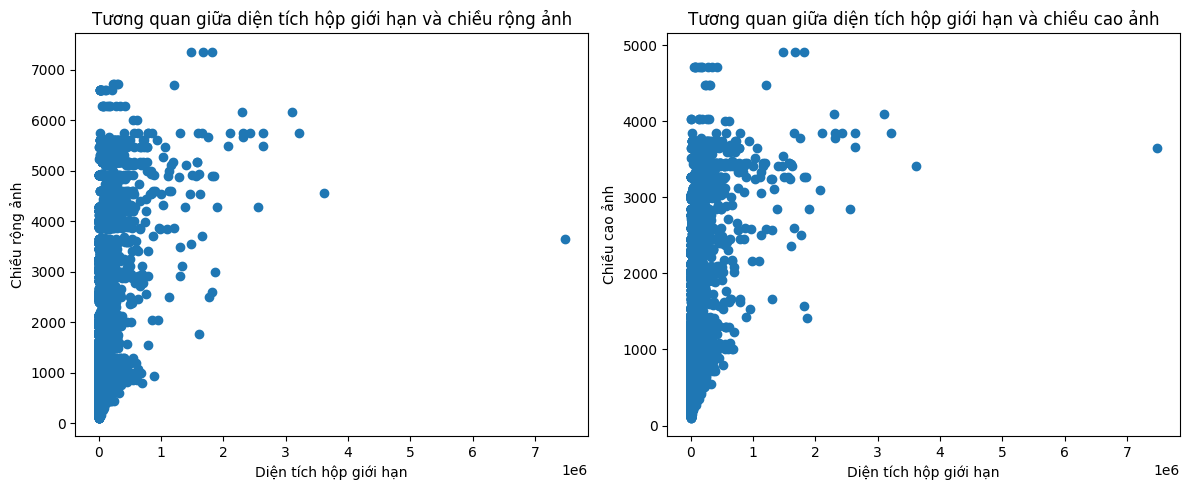

In [ ]:
dien_tich_ho_gioi_han = []
kich_thuoc_anh = []

for filename in os.listdir(folder_path):
    if filename.endswith(".xml"):
        duong_dan_file_xml = os.path.join(folder_path, filename)
        cay = ET.parse(duong_dan_file_xml)
        goc = cay.getroot()

        cac_doi_tuong = goc.findall('.//object')
        for doi_tuong in cac_doi_tuong:
            xmin = int(doi_tuong.find('bndbox/xmin').text)
            ymin = int(doi_tuong.find('bndbox/ymin').text)
            xmax = int(doi_tuong.find('bndbox/xmax').text)
            ymax = int(doi_tuong.find('bndbox/ymax').text)

            dien_tich = (xmax - xmin) * (ymax - ymin)
            dien_tich_ho_gioi_han.append(dien_tich)

            chieu_rong_anh = int(goc.find('size/width').text)
            chieu_cao_anh = int(goc.find('size/height').text)
            kich_thuoc_anh.append((chieu_rong_anh, chieu_cao_anh))

# Tạo DataFrame
df_dien_tich_ho_gioi_han = pd.DataFrame({'Diện tích hộp giới hạn': dien_tich_ho_gioi_han})
df_kich_thuoc_anh = pd.DataFrame(kich_thuoc_anh, columns=['Chiều rộng ảnh', 'Chiều cao ảnh'])

# Vẽ biểu đồ tương quan giữa diện tích hộp giới hạn và kích thước ảnh
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_dien_tich_ho_gioi_han['Diện tích hộp giới hạn'], df_kich_thuoc_anh['Chiều rộng ảnh'])
plt.title('Tương quan giữa diện tích hộp giới hạn và chiều rộng ảnh')
plt.xlabel('Diện tích hộp giới hạn')
plt.ylabel('Chiều rộng ảnh')

plt.subplot(1, 2, 2)
plt.scatter(df_dien_tich_ho_gioi_han['Diện tích hộp giới hạn'], df_kich_thuoc_anh['Chiều cao ảnh'])
plt.title('Tương quan giữa diện tích hộp giới hạn và chiều cao ảnh')
plt.xlabel('Diện tích hộp giới hạn')
plt.ylabel('Chiều cao ảnh')

plt.tight_layout()
plt.show()

phân tích về phân bố của các đối tượng trên các ảnh, cũng như một phân tích về vị trí cụ thể của từng đối tượng trên mỗi ảnh

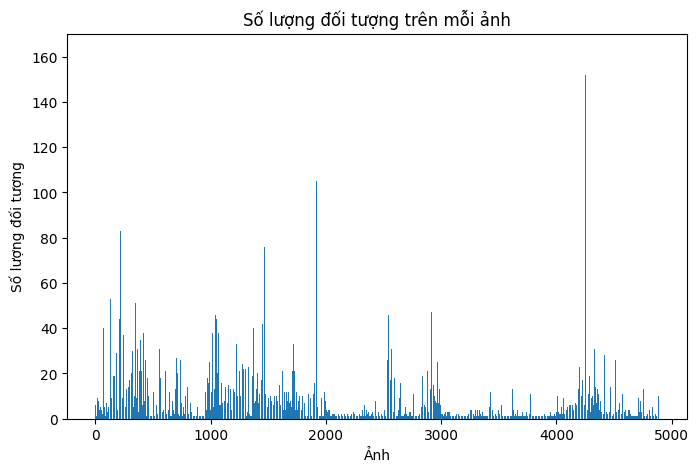

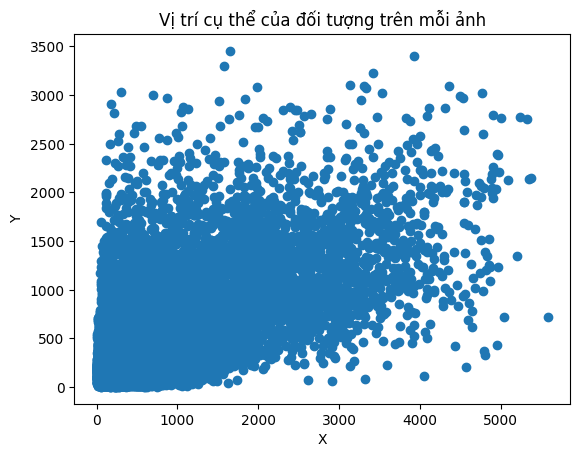

In [ ]:
object_counts_per_image = []

for filename in os.listdir(folder_path):
    if filename.endswith(".xml"):
        xml_file_path = os.path.join(folder_path, filename)
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        num_objects = len(root.findall('.//object'))
        object_counts_per_image.append(num_objects)

# Biểu đồ sự phân tán của đối tượng qua các ảnh
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(object_counts_per_image) + 1), object_counts_per_image)
plt.title('Số lượng đối tượng trên mỗi ảnh')
plt.xlabel('Ảnh')
plt.ylabel('Số lượng đối tượng')
plt.show()

# Phân tích vị trí cụ thể của từng đối tượng trên mỗi ảnh
object_positions_per_image = []

for filename in os.listdir(folder_path):
    if filename.endswith(".xml"):
        xml_file_path = os.path.join(folder_path, filename)
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        object_positions = []
        for obj in root.findall('.//object/bndbox'):
            xmin = int(obj.find('xmin').text)
            ymin = int(obj.find('ymin').text)
            xmax = int(obj.find('xmax').text)
            ymax = int(obj.find('ymax').text)

            object_positions.append(((xmin + xmax) / 2, (ymin + ymax) / 2))

        object_positions_per_image.extend(object_positions)

# Biểu đồ vị trí cụ thể của đối tượng trên mỗi ảnh
positions_df = pd.DataFrame(object_positions_per_image, columns=['X', 'Y'])
plt.scatter(positions_df['X'], positions_df['Y'])
plt.title('Vị trí cụ thể của đối tượng trên mỗi ảnh')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Kiểm tra độ đồng nhất giữa các loại đối tượng

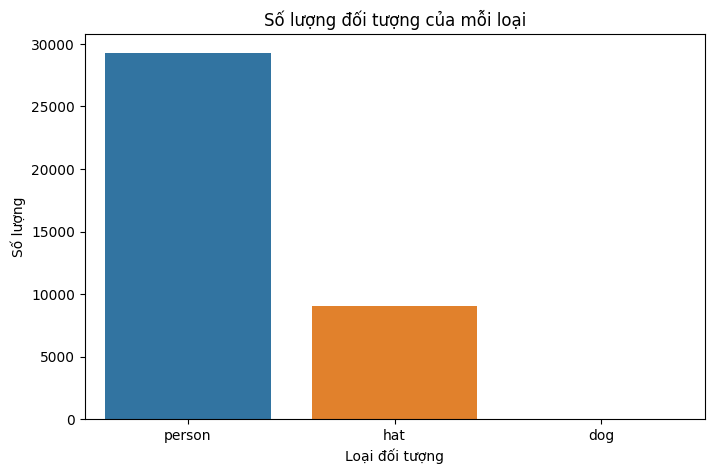

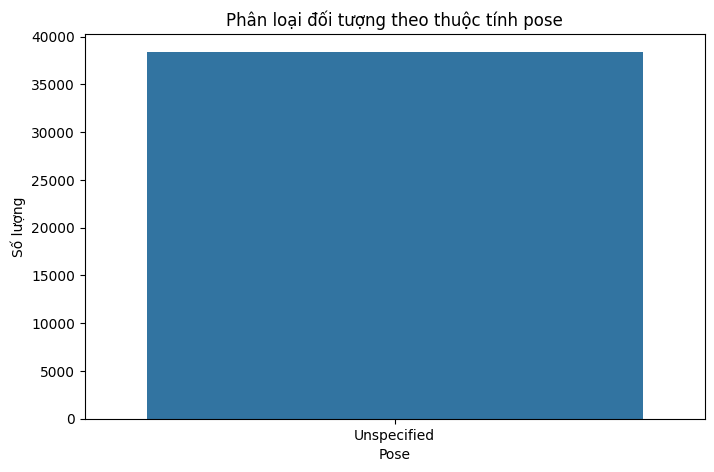

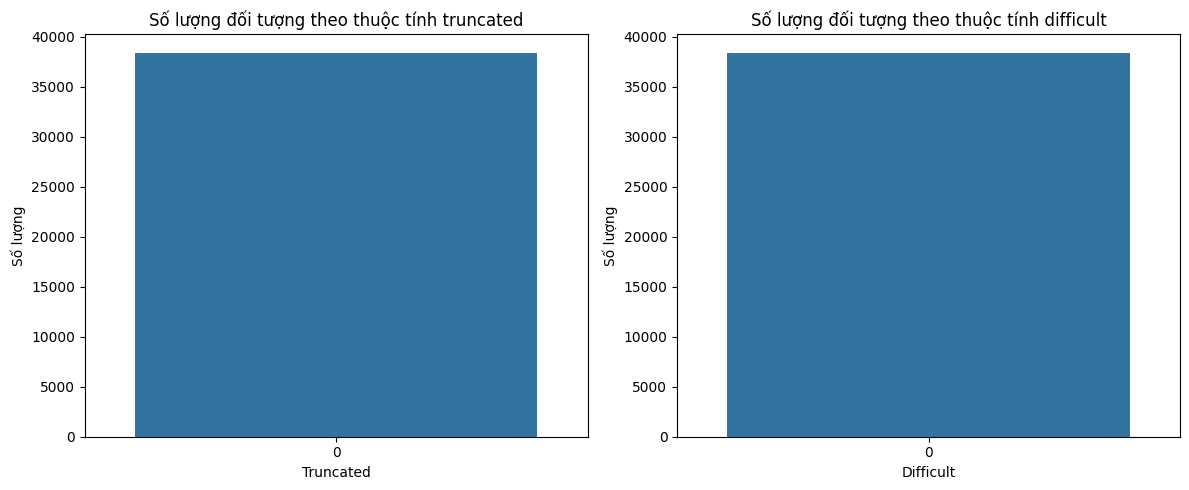

In [ ]:
object_types_all = []

for filename in os.listdir(folder_path):
    if filename.endswith(".xml"):
        xml_file_path = os.path.join(folder_path, filename)
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        object_types = [obj.find('name').text for obj in root.findall('.//object')]
        object_types_all.extend(object_types)

# Chuyển list thành Series của pandas
object_types_series = pd.Series(object_types_all)

# Đếm số lần xuất hiện của mỗi loại đối tượng
object_counts = object_types_series.value_counts()

# Biểu đồ độ đồng nhất giữa các loại đối tượng
plt.figure(figsize=(8, 5))
sns.barplot(x=object_counts.index, y=object_counts.values)
plt.title('Số lượng đối tượng của mỗi loại')
plt.xlabel('Loại đối tượng')
plt.ylabel('Số lượng')
plt.show()
poses_all = []

for filename in os.listdir(folder_path):
    if filename.endswith(".xml"):
        xml_file_path = os.path.join(folder_path, filename)
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        poses = [obj.find('pose').text for obj in root.findall('.//object')]
        poses_all.extend(poses)
# Chuyển list thành Series của pandas
poses_series = pd.Series(poses_all)

# Đếm số lần xuất hiện của mỗi giá trị pose
pose_counts = poses_series.value_counts()

# Biểu đồ phân loại các đối tượng theo thuộc tính pose
plt.figure(figsize=(8, 5))
sns.barplot(x=pose_counts.index, y=pose_counts.values)
plt.title('Phân loại đối tượng theo thuộc tính pose')
plt.xlabel('Pose')
plt.ylabel('Số lượng')
plt.show()
truncated_values = []
difficult_values = []

for filename in os.listdir(folder_path):
    if filename.endswith(".xml"):
        xml_file_path = os.path.join(folder_path, filename)
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        truncated_values.extend([int(obj.find('truncated').text) for obj in root.findall('.//object')])
        difficult_values.extend([int(obj.find('difficult').text) for obj in root.findall('.//object')])

# Biểu đồ kiểm tra thuộc tính truncated và difficult
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(truncated_values)
plt.title('Số lượng đối tượng theo thuộc tính truncated')
plt.xlabel('Truncated')
plt.ylabel('Số lượng')

plt.subplot(1, 2, 2)
sns.countplot(difficult_values)
plt.title('Số lượng đối tượng theo thuộc tính difficult')
plt.xlabel('Difficult')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()


phân tích về độ đồng nhất của bounding box trên các ảnh và kiểm tra mối quan hệ giữa các đối tượng

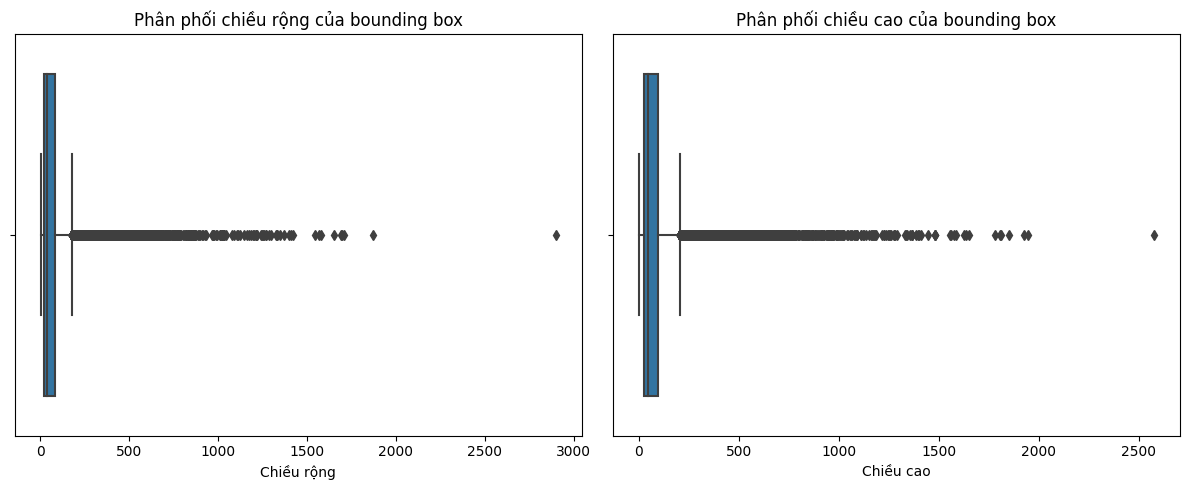

In [ ]:
bounding_box_data = []

for filename in os.listdir(folder_path):
    if filename.endswith(".xml"):
        xml_file_path = os.path.join(folder_path, filename)
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        objects = root.findall('.//object')
        for obj in objects:
            name = obj.find('name').text
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)

            bounding_box_data.append({'Name': name, 'Xmin': xmin, 'Ymin': ymin, 'Xmax': xmax, 'Ymax': ymax})

# Create DataFrame
areas_df = pd.DataFrame(bounding_box_data)

# Biểu đồ độ đồng nhất của bounding box
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=areas_df['Xmax'] - areas_df['Xmin'])
plt.title('Phân phối chiều rộng của bounding box')
plt.xlabel('Chiều rộng')

plt.subplot(1, 2, 2)
sns.boxplot(x=areas_df['Ymax'] - areas_df['Ymin'])
plt.title('Phân phối chiều cao của bounding box')
plt.xlabel('Chiều cao')

plt.tight_layout()
plt.show()

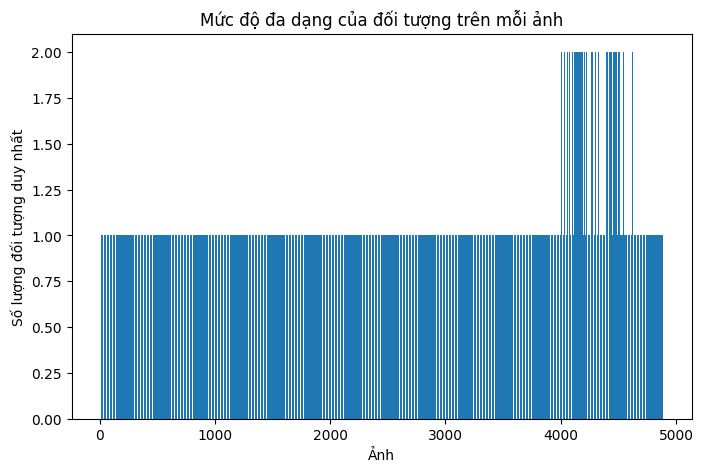

In [ ]:
unique_objects_per_image = []

for filename in os.listdir(folder_path):
    if filename.endswith(".xml"):
        xml_file_path = os.path.join(folder_path, filename)
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        objects = [obj.find('name').text for obj in root.findall('.//object')]
        unique_objects_per_image.append(len(set(objects)))

# Biểu đồ mức độ đa dạng của đối tượng trên mỗi ảnh
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(unique_objects_per_image) + 1), unique_objects_per_image)
plt.title('Mức độ đa dạng của đối tượng trên mỗi ảnh')
plt.xlabel('Ảnh')
plt.ylabel('Số lượng đối tượng duy nhất')
plt.show()
